In [1]:
import numpy as np
import scipy as sc
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from opt_utils import *
from grad_utils import *
%matplotlib inline

# load data

In [2]:
data = np.load('simulation_data.npy')
latent = np.load('simulation_latent.npy')

# parameters

In [4]:
# optimization parameters
l_penalty = 1
max_iter = 1000
ths = 1e-12

# vanilla PGD parameters
step_size = 0.03

# backtracking parameters
step_init = 0.1
max_back = 100
a = 0.2
b = 0.5

# Squared L2 penalty

## Newton

In [3]:
# initialize record
objective_nt, beta_nw = newton_l2_sq(data = data)

initial objective value: 13028.394406
1-th Newton, objective value: 10692.855538
2-th Newton, objective value: 10574.012670
3-th Newton, objective value: 10568.888166
4-th Newton, objective value: 10568.843439
5-th Newton, objective value: 10568.843431
6-th Newton, objective value: 10568.843431
Converged!


## Proximal Gradient

# PGD with backtracking line search

In [5]:
objective_pgd, beta_pgd = pgd_l2_sq(data = data)

initial objective value: 13028.394406
1-th PGD, objective value: 11036.524091
2-th PGD, objective value: 10743.416906
3-th PGD, objective value: 10649.452337
4-th PGD, objective value: 10610.234013
5-th PGD, objective value: 10571.182814
6-th PGD, objective value: 10569.226704
7-th PGD, objective value: 10569.059991
8-th PGD, objective value: 10568.887953
9-th PGD, objective value: 10568.869441
10-th PGD, objective value: 10568.849153
11-th PGD, objective value: 10568.846869
12-th PGD, objective value: 10568.844207
13-th PGD, objective value: 10568.843904
14-th PGD, objective value: 10568.843539
15-th PGD, objective value: 10568.843497
16-th PGD, objective value: 10568.843446
17-th PGD, objective value: 10568.843440
18-th PGD, objective value: 10568.843433
19-th PGD, objective value: 10568.843432
20-th PGD, objective value: 10568.843431
21-th PGD, objective value: 10568.843431
22-th PGD, objective value: 10568.843431
23-th PGD, objective value: 10568.843431
24-th PGD, objective value: 

# objective plot

In [6]:
obj_opt = np.min([np.min(objective_pgd), 
                  np.min(objective_nt)])

c:\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


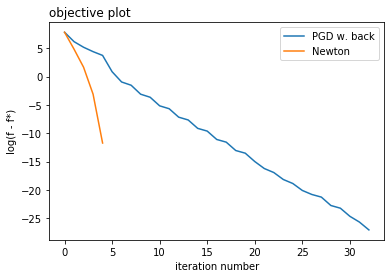

In [7]:
f = plt.figure(1, figsize = (6,4))

plt.plot(np.log(objective_pgd - obj_opt), label="PGD w. back")
plt.plot(np.log(objective_nt - obj_opt), label="Newton")

plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_new.pdf", bbox_inches='tight')

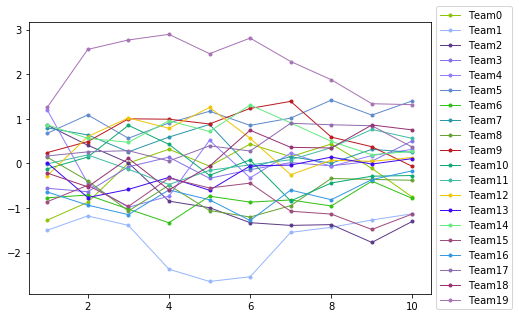

In [12]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=np.random.rand(3,),marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
f.savefig("l2_sq_solution.pdf", bbox_inches='tight')